**Part 0**

In [1]:
import numpy as np

In [7]:
# make non-linear data
n = 200
d = 3
x = np.random.uniform(-1, 1, (n, d))

In [9]:
weights_true = np.array([[5, 1, 1],]).T

In [11]:
bias_true = np.array([1])

In [13]:
y_true = (x**3) @ weights_true + (x**2) @ weights_true + x @ weights_true + bias_true

In [14]:
print(f'x shape: {x.shape}, weights shape: {weights_true.shape}')
print(f'bias_true shape: {bias_true.shape}, y_true shape: {y_true.shape}')

x shape: (200, 3), weights shape: (3, 1)
bias_true shape: (1,), y_true shape: (200, 1)


In [20]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

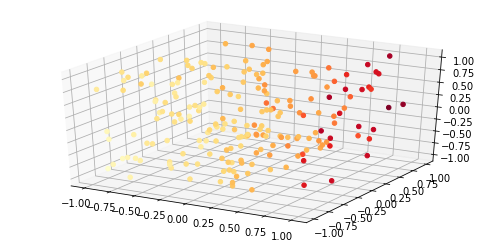

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true, cmap='YlOrRd', alpha=1)
plt.show()

In [19]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true)**2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    return self.gradient


In [45]:
# linear model
class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros([1])

  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum()
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights = lr * self.weights_gradient
    self.bias = self.bias = lr * self.bias_gradient


In [34]:
loss = MSE()
linear = Linear(3) # 3 dimension
y_pred = linear(x)

In [35]:
print(loss(y_pred, y_true))

30.77029734814485


In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

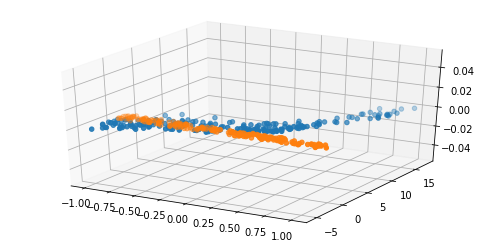

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:, 0], y_true)
ax.scatter(x[:, 0], y_pred)

plt.show()

# Part 1 - numpy only from scratch 3 layer deep neural network for non linear regression

Write  a colab  numpy only from scratch 3 layer deep neural network for non linear regression . Use proper non linear activation functions and proper number of hidden layer neurons - show the results / loss and epochs training and final output . You will be doing manual backprop and chain rule based gradient propagation 

In [2]:
import numpy as np

In [3]:
class Relu:
  def __call__(self, input_):
    self.input_ = input_
    self.output = np.clip(self.input_, 0, None)
    return self.output

  def backward(self, output_gradient):
    self.input_gradient = (self.input_ > 0) * output_gradient
    return self.input_gradient


In [4]:
relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


In [40]:
# non-linear model
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)

  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2

  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)


In [9]:
# make non-linear data
n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1],]).T

bias_true = np.array([1])

y_true = (x**2) @ weights_true + x @ weights_true + bias_true

print(f'x shape: {x.shape}, weights shape: {weights_true.shape}')
print(f'bias_true shape: {bias_true.shape}, y_true shape: {y_true.shape}')

x shape: (200, 2), weights shape: (2, 1)
bias_true shape: (1,), y_true shape: (200, 1)


In [47]:
loss = MSE()
model = Model(d, 10)

In [48]:
y_pred = model(x)

In [49]:
loss_value = loss(y_pred, y_true)
print(loss_value)

21.83325389136915


In [50]:
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)

In [52]:
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

29.347194786477065


-------------------


# part 2 - Write a colab pytorch from scratch - 3 layer deep neural network for non linear regression withotu using pytorch builtin layer functionality

In [ ]:
#!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [ ]:
print(torch.__version__)

1.10.0+cu111


--------------------

In [ ]:
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

In [ ]:
# initial weight
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

In [ ]:
# model prediction
def forward(x):
  return w*x

In [ ]:
# loss = MSE
def loss(y, y_pred):
  return((y_pred - y)**2).mean()

In [ ]:
print(f'Prediction before training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000


In [ ]:
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients = backward pass
  # dw = gradient(X, Y, y_pred)
  l.backward() # find gradient

  # update weights
  with torch.no_grad():
    w -= learning_rate * w.grad

  # zero gradients
  w.grad.zero_()

  if epoch % 2 == 0:
    print(f'epoch {epoch+1}: w = {w:3f}, loss = {l:8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}') 

epoch 1: w = 0.300000, loss = 30.000000
epoch 3: w = 0.771750, loss = 15.660188
epoch 5: w = 1.112589, loss = 8.174717
epoch 7: w = 1.358846, loss = 4.267253
epoch 9: w = 1.536766, loss = 2.227532
epoch 11: w = 1.665314, loss = 1.162786
epoch 13: w = 1.758189, loss = 0.606981
epoch 15: w = 1.825292, loss = 0.316848
epoch 17: w = 1.873773, loss = 0.165397
epoch 19: w = 1.908801, loss = 0.086338
Prediction after training: f(5) = 9.612


# part 3 - Write  a colab pytorch classes based - 3 layer deep neural network for non linear regression using pytorch builtin functionality of modules etc.,. backprop etc.

In [ ]:
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

In [ ]:
# initial weight
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

In [ ]:
# model prediction
def forward(x):
  return w*x

In [ ]:
print(f'Prediction before training: f(5) = {forward(5):.3f}')

learning_rate = 0.01
n_iters = 10

loss = nn.MSELoss() # use MSE
# optimizer
optimizer = torch.optim.SGD([w], lr=learning_rate)

# training loop
for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients = backward pass
  # dw = gradient(X, Y, y_pred)
  l.backward() # find gradient

  # update weights
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  if epoch % 2 == 0:
    print(f'epoch {epoch+1}: w = {w:3f}, loss = {l:8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}') 

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300000, loss = 30.000000
epoch 3: w = 0.771750, loss = 15.660188
epoch 5: w = 1.112589, loss = 8.174717
epoch 7: w = 1.358846, loss = 4.267253
epoch 9: w = 1.536766, loss = 2.227532
Prediction after training: f(5) = 8.031


# part 4 - Write a colab  pytorch lightening version of the same

In [ ]:
%%capture
! pip install git+https://github.com/PytorchLightning/pytorch-lightning.git@master --upgrade

In [ ]:
import torch
from torch import nn
import pytorch_lightning as pl
from torch.utils.data import DataLoader, random_split
from torch.nn import functional as F
from torchvision.datasets import MNIST
from torchvision import datasets, transforms
import os

In [ ]:
class LightningMNISTClassifier(pl.LightningModule):

  def __init__(self):
    super().__init__()

    # mnist images are (1, 28, 28) (channels, width, height) 
    self.layer_1 = torch.nn.Linear(28 * 28, 128)
    self.layer_2 = torch.nn.Linear(128, 256)
    self.layer_3 = torch.nn.Linear(256, 10)

  def forward(self, x):
      batch_size, channels, width, height = x.size()

      # (b, 1, 28, 28) -> (b, 1*28*28)
      x = x.view(batch_size, -1)

      # layer 1 (b, 1*28*28) -> (b, 128)
      x = self.layer_1(x)
      x = torch.relu(x)

      # layer 2 (b, 128) -> (b, 256)
      x = self.layer_2(x)
      x = torch.relu(x)

      # layer 3 (b, 256) -> (b, 10)
      x = self.layer_3(x)

      # probability distribution over labels
      x = torch.log_softmax(x, dim=1)

      return x

  def cross_entropy_loss(self, logits, labels):
    return F.nll_loss(logits, labels)

  def training_step(self, train_batch, batch_idx):
      x, y = train_batch
      logits = self.forward(x)
      loss = self.cross_entropy_loss(logits, y)
      self.log('train_loss', loss)
      return loss

  def validation_step(self, val_batch, batch_idx):
      x, y = val_batch
      logits = self.forward(x)
      loss = self.cross_entropy_loss(logits, y)
      self.log('val_loss', loss)

  def configure_optimizers(self):
      optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
      return optimizer

In [ ]:
# data
# transforms for images
transform=transforms.Compose([transforms.ToTensor(), 
                              transforms.Normalize((0.1307,), (0.3081,))])

# prepare transforms standard to MNIST
mnist_train = MNIST(os.getcwd(), train=True, download=True, transform=transform)
mnist_test = MNIST(os.getcwd(), train=False, download=True, transform=transform)

train_dataloader = DataLoader(mnist_train, batch_size=64)
val_loader = DataLoader(mnist_test, batch_size=64)

# train
model = LightningMNISTClassifier()
trainer = pl.Trainer()

trainer.fit(model, train_dataloader, val_loader)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/loops/utilities.py:93: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  category=PossibleUserWarning,
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name    | Type   | Params
-----------------------------------
0 | layer_1 | Linear | 100 K 
1 | layer_2 | Linear | 33.0 K
2 | layer_3 | Linear | 2.6 K 
-----------------------------------
136 K     Trainable params
0         Non-trainable params
136 K     Total params
0.544     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:727: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


# part 5 - Tensorflow various variants low level, api, functional, model, builtin 

In [ ]:
!pip install seaborn

In [ ]:
from __future__ import absolute_import, division, print_function

import pathlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


------------------------

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


**Clean the data**

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
# convert data to number
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [ ]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [ ]:
# Split the data into training and test sets
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
# get the labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [ ]:
#train_labels, test_labels

In [ ]:
# Normalization: 把数据限制0-1范围
import numpy as np

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

------------------

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
# 把input代入model
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                640       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [ ]:
# training
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 4.46 s, sys: 217 ms, total: 4.68 s
Wall time: 4.75 s


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

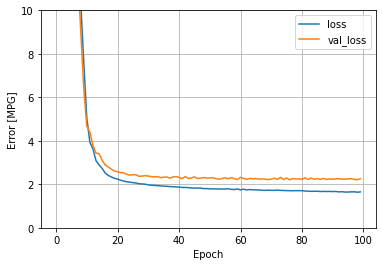

In [ ]:
plot_loss(history)

In [ ]:
# Collect the results on the test set:
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
dnn_model,1.645707


# part 6 - Write  a colab  tensorflow only from scratch not using high level api  of the same

In [65]:
# exponential function
from math import exp
## example datasets
from sklearn.datasets import make_circles, make_blobs
## to randomly split data
from sklearn.model_selection import train_test_split
## to shuffle the data randomly
from sklearn.utils import shuffle
## to score classification tasks
from sklearn.metrics import roc_auc_score, roc_curve, auc

# lastly, a nice plotting module for visualizing my rambles
import matplotlib.pyplot as plt
## a colormap function
from matplotlib.cm import get_cmap as cmap

In [57]:
def sigmoid(x):
    if x >= 0:
        z = exp(-x)
        return 1 / (1 + z)
    else:
        z = exp(x)
        return z / (1 + z)

In [58]:
# derivative of sigmoid function (needed for calculus in of back-propagation).
prime = lambda x: sigmoid(x) * (1 - sigmoid(x))

In [59]:
# vectorizing a function just means that 
# I can now easily apply it element-wise to a numpy ndarray
sigmoid = np.vectorize(sigmoid)
prime = np.vectorize(prime)

In [60]:
class Layer:

    def __init__(self, ncol, nrow):

        # number of inputs & outputs
        self.shape = (nrow, ncol)

        # values of the weights
        self.weights = np.random.randn(nrow, ncol)

        # values of biases
        self.biases = np.random.randn(nrow, 1)

        # placeholder for unactivated output of layer
        self.outputs = np.ones((nrow, 1))

        # activation function (currently fixed as sigmoid)
        self.activator = np.vectorize(sigmoid)

        # derivative of activation function
        self.primer = np.vectorize(prime)

In [61]:
# create layers
# Layer(ncol, nrow)
layer = Layer(3, 5)

print(f'\n weights: shape = {layer.weights.shape} \n {layer.weights}')
print(f'\n biases: shape = {layer.biases.shape} \n {layer.biases}')
print(f'\n sigmoid(3) = {layer.activator(3):.4}')


 weights: shape = (5, 3) 
 [[ 0.0448902  -0.69166528  0.40861685]
 [ 1.63279413 -0.27003892 -0.29139929]
 [-0.9604142   0.525157   -1.18356573]
 [-0.37347912  0.26101058  0.77728542]
 [-0.71915793  0.92255579  0.46259974]]

 biases: shape = (5, 1) 
 [[-0.68633464]
 [-1.9759818 ]
 [-0.46214433]
 [ 0.98749664]
 [-0.51867716]]

 sigmoid(3) = 0.9526


In [66]:
class NeuralNetwork:
    
    def __init__(self, *shape, epochs = 50, lr = 0.001):

        # stores number of nodes at each layer
        self.shape = shape

        # placeholder to store pairs of layers
        self.layers = []

        # static hyperparameters
        self.epochs = epochs
        self.lr = lr
            
        # create layers as pairs of inputs
        for inputs, outputs in pairwise(shape):
            self.layers.append(Layer(inputs, outputs))

        # placeholder to store scores for each epoch
        self.scores = []

    def forward(self, x):

        # reshape input to fit succeeding layers
        tensor = np.atleast_2d(x).transpose()

        # for each layer 
        for layer in self.layers:
            
            # multiply inputs by their weights and add their bias
            tensor = layer.outputs = layer.weights.dot(tensor) + layer.biases

            # activate output
            tensor = layer.activator(tensor)

        # return final activated output
        return tensor

    def backward(self, error):

        # error is already initialized for the final output layer!

        # for each layer in reverse order
        for index, layer in reversed(list(enumerate(self.layers))):

            # find preceding layer
            predecessor = self.layers[index - 1]

            # define delta as the partial derivative of layers input with respect to its weights
            delta = error @ predecessor.activator(predecessor.outputs).transpose()

            # change weights by their assigned blame dampened by the learning rate
            layer.weights -= delta * self.lr

            # change biases by their subsequent node's blame dampened by the learning rate
            layer.biases -= error * self.lr

            # update error as the blame for preceding layer
            error = layer.weights.transpose().dot(error) * predecessor.primer(predecessor.outputs)
  
    def predict(self, X):

        # predict based on each observation in X
        predictions = [self.forward(obs) for obs in X]

        # return array of predictions
        return np.array(predictions).squeeze()

    def score(self, inputs, answer, verbose=True):

        # find predictions of all inputs
        prediction = self.predict(inputs)

        # find comparison of predictions with the actual answers
        auc = roc_auc_score(answer, prediction)
        
        if verbose:
            print(f'auc = [{auc:.1%}].')

        return auc

    def fit(self, X, y, target = None):

        self.decision_boundary = np.average(y)

        # for each epoch
        for epoch in range(self.epochs):    

            # shuffle data
            X, y = shuffle(X, y)

            # append score
            score = self.score(X, y, verbose=False)
            self.scores.append(score)

            if target is not None:
                if score > target:
                    break

            # for each record in shuffled data 
            for inputs, answer in zip(X, y):

                # predict answer
                prediction = self.forward(inputs)

                # find error of output layer
                error = prediction - answer

                # propagate that backwards
                self.backward(error)


    def plot_errors(self, X, y):

        # this guy plots the first two dimensions of a dataset in a scatterplot
        # each point is colored green if it was correctly predicted, otherwise it is printed red

        predictions = self.predict(X) > self.decision_boundary
        incorrect = np.logical_xor(predictions, y)
        plt.scatter(X.T[0][incorrect], X.T[1][incorrect], c='red')
        plt.scatter(X.T[0][~incorrect], X.T[1][~incorrect], c='green')
        plt.axis('off'); plt.show()

    def plot_scores(self):

        # plots the AUC for each epoch

        x = list(range(len(self.scores)))
        y = self.scores
        plt.plot(x, y)
        plt.ylim(top=1.0, bottom=0.0)
        plt.title("In-sample AUC score prior to each epoch")
        plt.show()

    def graph(self):

        colormap = cmap('RdYlGn', 2)
        
        for index, layer in enumerate(self.layers):
            # initialize set of nodes
            nodes = set()
            output_size, feed_size = layer.shape
            for output_index, output in enumerate(range(output_size)):

                # arrows for output layer
                if index == len(self.layers) - 1:
                    plt.arrow(index + 1.1, output - output_size/2, 0.05, 0, head_width = 0.4, 
                        head_length = 0.05, color="steelblue", length_includes_head =True)

                # add all output nodes (if unique!)
                nodes.add((index + 1, output - output_size/2))

                # plot weights between biases and hidden/output layers
                height = max(self.shape)/2
                value = layer.biases[output_index, 0]
                plt.plot([index, index+1], [height, output - output_size/2],
                    c = colormap(value > 0), linewidth = min(8, abs(value)+0.25))

                # plot biases
                plt.scatter(index, height, s=150, c='white', edgecolors='black', zorder = 10)
                plt.text(index, height, s='1', zorder = 100, 
                    horizontalalignment='center', verticalalignment='center')

                for feed_index, feeder in enumerate(range(feed_size)):

                    # arrows for input layer
                    if index == 0:
                        plt.arrow(index - 0.15, feeder - feed_size/2, 0.05, 0, head_width = 0.4,
                            head_length = 0.05, color="steelblue", length_includes_head =True)

                    # add all input nodes (if unique!)
                    nodes.add((index, feeder - feed_size/2))

                    # plot weights between input and output nodes
                    value = layer.weights[output_index, feed_index]
                    plt.plot([index, index+1], [feeder - feed_size/2, output - output_size/2],
                        c = colormap(value > 0), linewidth = min(8, abs(value)+0.25))

                # plot set of nodes
                for node in nodes:
                    plt.scatter(*node, s=150, c='black', zorder = 10)

        plt.axis('off')
        plt.xlim(xmin=-0.2, xmax=len(self.layers) + 0.3)
        plt.ylim(ymin= -(max(self.shape)/2) - 1)
        plt.show()

In [63]:
from itertools import tee
def pairwise(iterable):
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

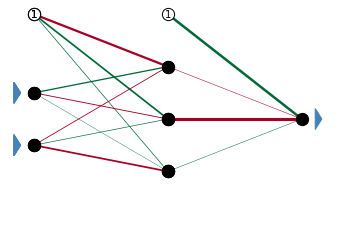

In [67]:
# neural network graph
nn = NeuralNetwork(2,3,1, epochs=50)
nn.graph()

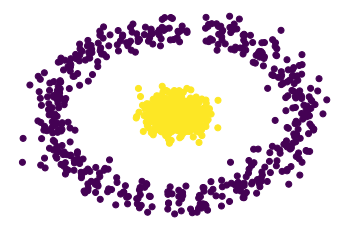

In [68]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.1)
plt.scatter(X.T[0], X.T[1], c=y)
plt.axis('off'); plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y)

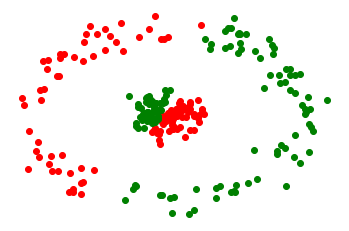

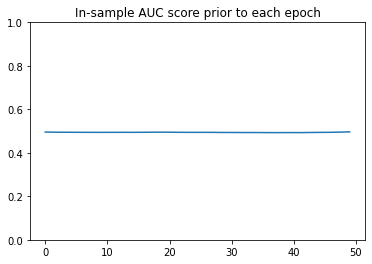

In [69]:
nn.fit(X_train, y_train)
nn.plot_errors(X_test, y_test)
nn.plot_scores()

# part 7 - Write a colab tensorflow only with builtin layers of the same

In [70]:
# mlp for regression
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [71]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(path, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [72]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(339, 13) (167, 13) (339,) (167,)


In [73]:
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))
# make a prediction
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

MSE: 58.959, RMSE: 7.679
Predicted: 28.723


# part 8 - Write a colab with Use functional api high level api  of tensorflow for the same

In [78]:
from tensorflow.keras.layers import Layer
import keras

In [86]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [76]:
class Linear(Layer):
  def __init__(self, units=32):
    super(Linear, self).__init__()
    self.units = units

  def build(self, input_shape):
    self.w = self.add_weight(shape=(input_shape[-1], self.units),
                             initializer = 'random_normal',
                             trainable=True)
    self.b = self.add_weight(shape=(self.units,),
                             initializer = 'random_normal',
                             trainable=True)

  def call(self, inputs):
    return tf.matmul(inputs, self.w) + self.b

In [92]:
class MLP(keras.layers.Layer):
  def __init__(self):
    super(MLP, self).__init__()
    self.linear_1 = Linear(32)
    self.linear_2 = Linear(32)
    self.linear_3 = Linear(10)

  def call(self, inputs):
    x = self.linear_1(inputs)
    x = tf.nn.relu(x)
    x = self.linear_2(x)
    x = tf.nn.relu(x)
    return self.linear_3(x)

In [93]:
mlp = MLP()

In [94]:
y = mlp(tf.ones(shape=(3, 64)))

In [95]:
mlp = keras.Sequential(
    [keras.layers.Dense(32, activation=tf.nn.relu),
     keras.layers.Dense(32, activation=tf.nn.relu),
     keras.layers.Dense(10)
    ]   
)